In [1]:
import os
from pathlib import Path

NOTEBOOK_PATH: Path = Path(os.path.abspath(''))

DATA_PATH: Path = NOTEBOOK_PATH.parent.joinpath('data')

PATH_FOR_RESULT: Path = NOTEBOOK_PATH.joinpath('RESULT')

if not PATH_FOR_RESULT.exists():
    PATH_FOR_RESULT.mkdir()

print(f'当前运行目录：{NOTEBOOK_PATH}')
print(f'当前数据目录：{DATA_PATH}')

当前运行目录：D:\Development\Python\InvestmentWorkshop\notebook
当前数据目录：D:\Development\Python\InvestmentWorkshop\data


# 缠论 B-02-1

分型和笔。

## 准备

### 引用模块

In [2]:
import pandas as pd

from utility import (
    get_available_datafile_name,
    load_csv_as_dataframe,
    plot_merged_candlestick,
)
from InvestmentWorkshop.indicator import (
    pbx,
    merge_candlestick_dataframe,
    chan_on_bar,
)

Load succeed.


### 设置 pandas

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

### 可用数据

In [4]:
price_datafile = get_available_datafile_name(DATA_PATH, 'Minute')

for symbol, _ in price_datafile:
    print(f'symbol: {symbol:>12}')

symbol:    DCE.c2201
symbol:    DCE.i2201
symbol:  SHFE.ag2106
symbol:  SHFE.al2111
symbol:  SHFE.al2112
symbol:  SHFE.hc2110
symbol:  SHFE.hc2201
symbol:  SHFE.hc2202
symbol:  SHFE.rb2201


### 声明数据

使用分钟数据。

In [5]:
symbol: str = 'SHFE.al2112'

# 开始时间
datetime_start: str = '2021-10-18 21:00:00'

# 结束时间
datetime_end: str = '2021-10-19 00:59:00'

### 加载数据

In [6]:
df_data: pd.DataFrame = load_csv_as_dataframe(DATA_PATH.joinpath(f'{symbol}_Minute.csv'))

df_ohlc: pd.DataFrame = df_data.loc[datetime_start:datetime_end, ['open', 'high', 'low', 'close']]

df_ohlc.info()
print('-' * 100)
df_ohlc.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2021-10-18 21:00:00 to 2021-10-19 00:59:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    240 non-null    float64
 1   high    240 non-null    float64
 2   low     240 non-null    float64
 3   close   240 non-null    float64
dtypes: float64(4)
memory usage: 9.4 KB
----------------------------------------------------------------------------------------------------


,open,high,low,close
datetime,,,,
2021-10-18 21:00:00,24700.0,24700.0,24515.0,24585.0
2021-10-18 21:01:00,24585.0,24610.0,24530.0,24530.0
2021-10-18 21:02:00,24530.0,24590.0,24520.0,24570.0
2021-10-18 21:03:00,24570.0,24575.0,24475.0,24530.0
2021-10-18 21:04:00,24530.0,24565.0,24495.0,24565.0


### 声明变量

In [7]:
# 合并后的K线
df_chan_candlestick: pd.DataFrame

# 分型
df_chan_fractal: pd.DataFrame

# 笔
df_chan_stroke: pd.DataFrame

## 计算结果

### Step 1

In [8]:
# df_chan_candlestick, df_chan_fractal, df_chan_stroke = chan_on_bar(df_ohlc)
df_chan_candlestick, df_chan_fractal = chan_on_bar(df_ohlc)

In [9]:
df_chan_candlestick

,index_data,period,high,low
0,0,3,24700.0,24515.0
1,3,2,24565.0,24475.0
2,5,1,24575.0,24525.0
3,6,2,24530.0,24480.0
4,8,1,24540.0,24485.0
...,...,...,...,...
135,231,3,24355.0,24350.0
136,234,1,24370.0,24355.0
137,235,1,24365.0,24350.0
138,236,2,24355.0,24340.0


In [10]:
df_chan_fractal

,idx_candlestick,type
0,1,-1
1,5,1
2,9,-1
3,12,-1
4,15,-1
5,19,-1
6,27,-1
7,32,1
8,36,1
9,39,1


### 检查合并K线的结果是否与之前的计算一样。

In [11]:
df_merged: pd.DataFrame = load_csv_as_dataframe(DATA_PATH.joinpath(f'{symbol}_merged.csv'))
df_merged = df_merged.loc[datetime_start:datetime_end]

df_merged

,包含？,本K更高？,本K更低？,前K本K方向,合并后高点,合并后低点,合并后周期,笔
datetime,,,,,,,,
2021-10-18 21:00:00,False,False,True,向下,24700.0,24515.0,1,NaN
2021-10-18 21:01:00,True,False,False,包含,24610.0,24515.0,2,NaN
2021-10-18 21:02:00,True,False,False,包含,24590.0,24515.0,3,NaN
2021-10-18 21:03:00,False,False,True,向下,24575.0,24475.0,1,NaN
2021-10-18 21:04:00,True,False,False,包含,24565.0,24475.0,2,NaN
...,...,...,...,...,...,...,...,...
2021-10-19 00:55:00,False,False,True,向下,24365.0,24350.0,1,NaN
2021-10-19 00:56:00,False,False,True,向下,24355.0,24345.0,1,NaN
2021-10-19 00:57:00,True,True,True,包含,24355.0,24340.0,2,NaN


In [12]:
for idx, val in df_chan_candlestick.iterrows():
    xx = int(val['index_data']+val['period'])-1
    if df_merged.iloc[xx].at['合并后高点'] != val['high']:
        print(f"df_chan_candlestick 的编号为 {idx} 的高点为 {val['high']}， 与此前计算不符。此前为 {df_merged.iloc[xx].at['合并后高点']}")
    if df_merged.iloc[xx].at['合并后低点'] != val['low']:
        print(f"df_chan_candlestick 的编号为 {idx} 的低点为 {val['low']}， 与此前计算不符。此前为 {df_merged.iloc[xx].at['合并后低点']}")

df_chan_candlestick 的编号为 0 的高点为 24700.0， 与此前计算不符。此前为 24590.0


### 画个图看看

In [13]:
import numpy as np
import mplfinance as mpf
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def plot_chan(df_data: pd.DataFrame,
              df_chan: pd.DataFrame,
              df_fractal: pd.DataFrame,
              merged_line_width: int = 3,
              debug: bool = False):
    """
    绘制合并后的K线。

    :param df_data:
    :param df_chan:
    :param df_fractal:
    :param merged_line_width:
    :param debug:

    ----
    :return:
    """
    mpf_color = mpf.make_marketcolors(
        up='red',       # 上涨K线的颜色
        down='green',   # 下跌K线的颜色
        inherit=True
    )

    mpf_style = mpf.make_mpf_style(
        marketcolors=mpf_color,
        rc={
            'font.family': 'SimHei',        # 指定默认字体：解决plot不能显示中文问题
            'axes.unicode_minus': False,    # 解决保存图像是负号'-'显示为方块的问题
        }
    )

    # 缠论的分型
    
    low_signal  = pd.Series(np.nan, index=df_data.index)
    high_signal = pd.Series(np.nan, index=df_data.index)
    
    def fractal_b(percentB, price) -> list:
        """
        底分型。
        """
        signal   = []
        previous = -1.0
        for date, value in percentB.iteritems():
            if value < 0 and previous >= 0:
                signal.append(price[date]*0.99)
            else:
                signal.append(np.nan)
            previous = value
        return signal

    for idx, val in df_fractal.iteritems():
        data_index = df_data.index[int(df_chan.iloc[val['idx_candlestick']].at['index_data'])]
        if val['type'] == 1:
            price = df_chan.iloc[val['idx_candlestick']].at['high']
            high_signal[data_index] = price*1.1
        elif val['type'] == -1:
            price = df_chan.iloc[val['idx_candlestick']].at['low']
            high_signal[data_index] = price*0.9
    
    fractal = [
        mpf.make_addplot(low_signal, type='scatter', markersize=200, marker='^'),
        mpf.make_addplot(high_signal, type='scatter', markersize=200, marker='V'),
    ]
    
    
    mpf_config = {}

    fig, ax_list = mpf.plot(
        df_data,
        title='AL2111',
        type='candle',
        addplot=fractal,
        volume=False,
        show_nontrading=False,
        figratio=(800, 300),
        figscale=2,
        style=mpf_style,
        tight_layout=True,
        returnfig=True,
        return_width_config=mpf_config,
        warn_too_much_data=1000
    )

    candle_width = mpf_config['candle_width']
    line_width = mpf_config['line_width']

    if debug:
        for k, v in mpf_config.items():
            print(k, v)

    # 整理合并元素。
    merged_rectangle = []

    for idx, val in df_chan.iterrows():
        x0 = val['index_data'] - candle_width / 2
        y0 = val['low']
        w = val['period'] - 1 + candle_width
        h = val['high'] - val['low']
        merged_rectangle.append(
            Rectangle(xy=(x0, y0), width=w, height=h, angle=0, linewidth=line_width*merged_line_width)
        )

    # 生成矩形。
    patch_collection = PatchCollection(
        merged_rectangle,
        edgecolor='black',
        facecolor='none'
    )

    ax1 = ax_list[0]
    ax1.add_collection(patch_collection)
    ax1.autoscale_view()

    print('Done.')

ValueError: zero-size array to reduction operation maximum which has no identity

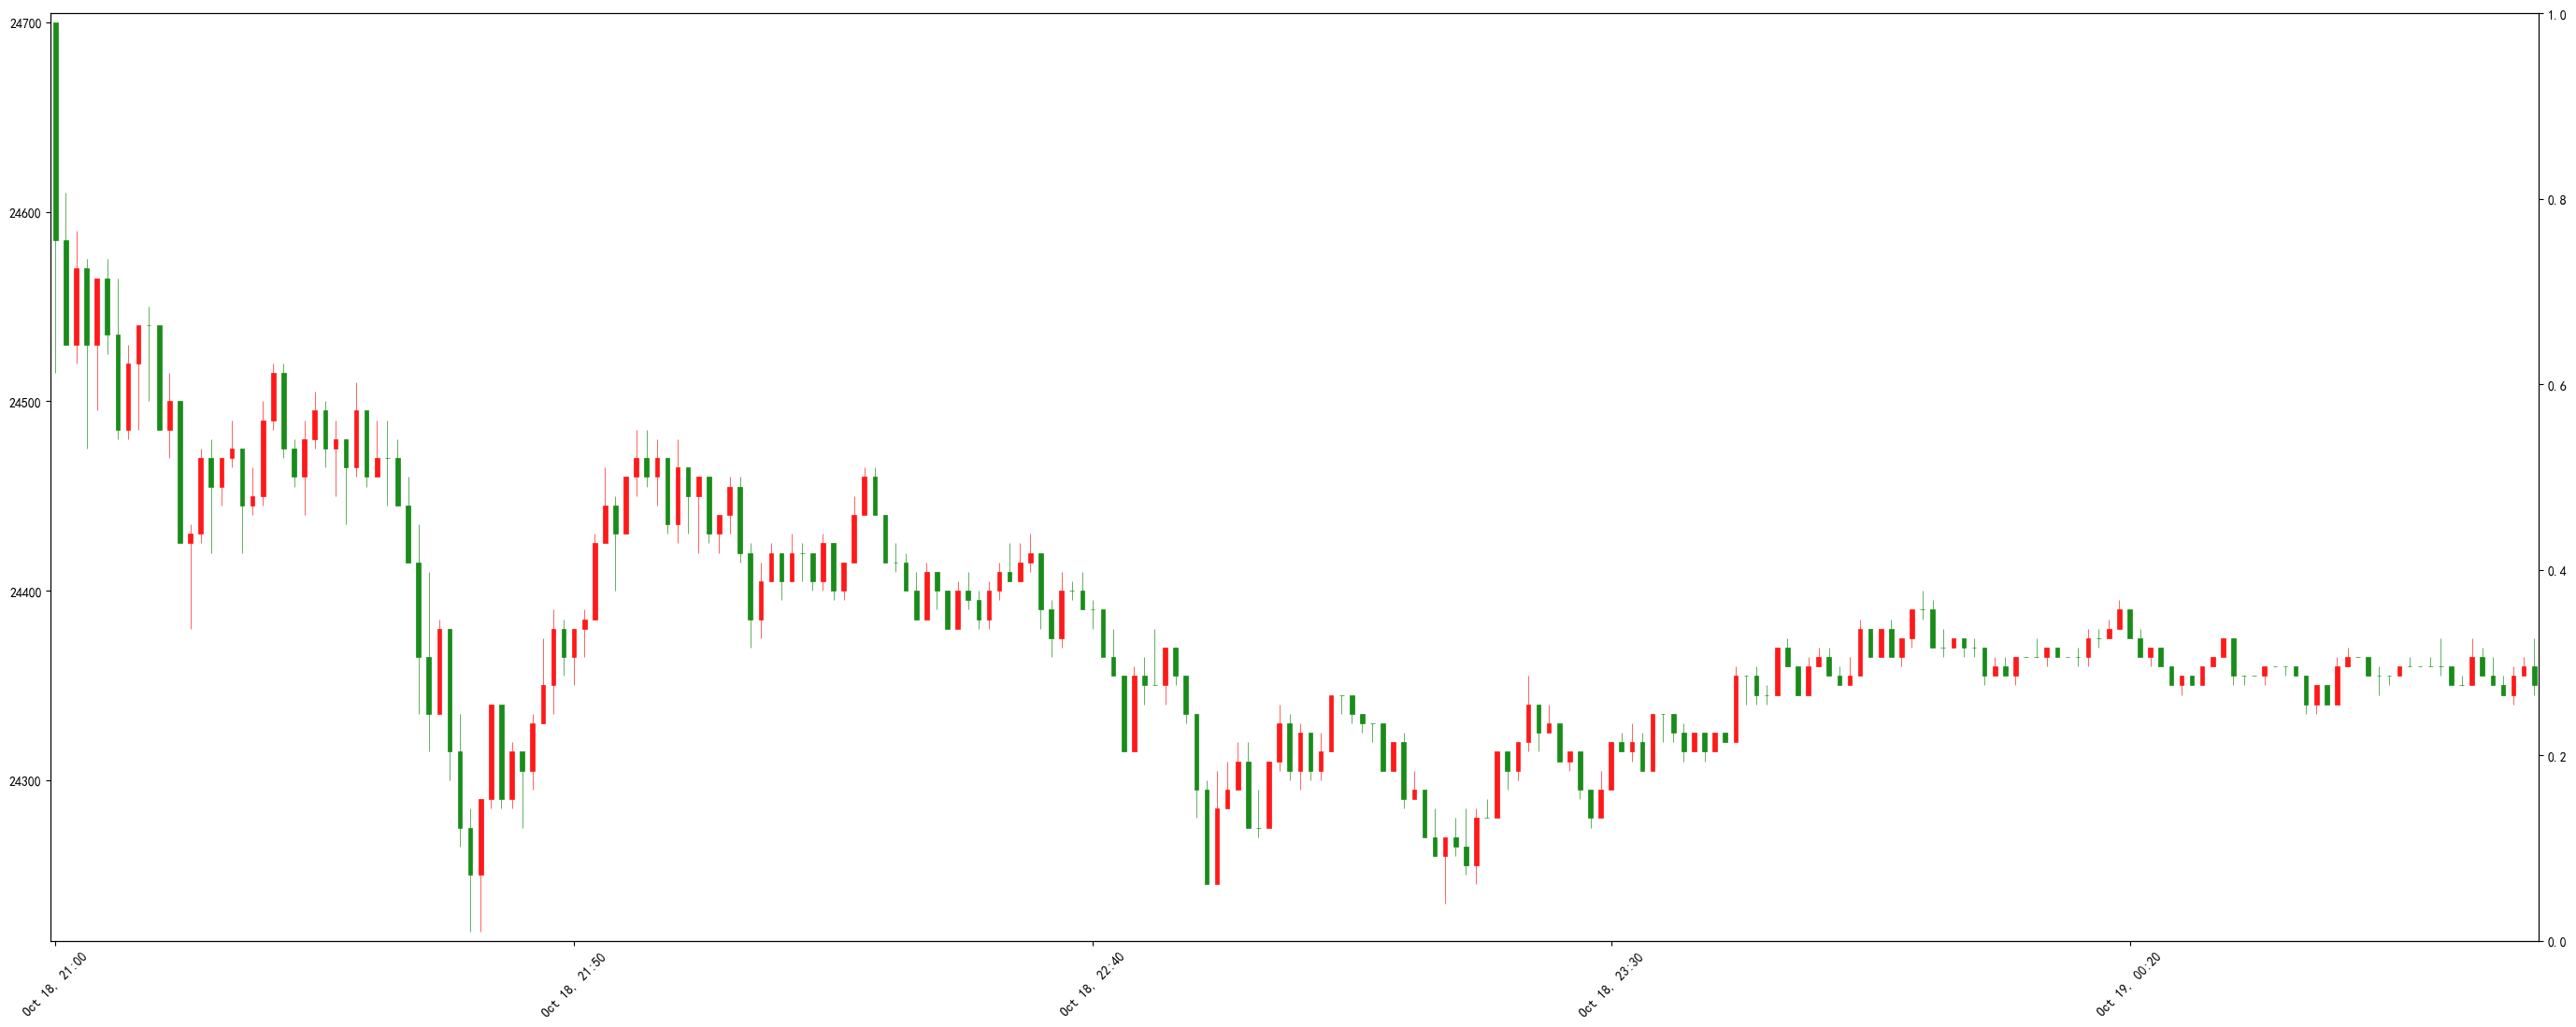

In [14]:
plot_chan(
    df_ohlc,
    df_chan_candlestick,
    df_chan_fractal
)